# EXERCISE MUSHROOMS

## The data

Additional Information

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like leaflets three, let it be for Poisonous Oak and Ivy.

Original Data Source = https://archive-beta.ics.uci.edu/ml/datasets/mushroom
It's hihgly reccomended to read the information about the data in: https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names 

0. Target:
    * edible: e
    * poisonous: p
1. cap-shape:                
    * bell=b
    * conical=c
    * convex=x
    * flat=f
    * knobbed=k
    * sunken=s
2. cap-surface:              
    * fibrous=f
    * grooves=g
    * scaly=y
    * smooth=s
3. cap-color:
    * brown=n
    * buff=b
    * cinnamon=c
    * gray=g
    * green=r
    * pink=p
    * purple=u
    * red=e
    * white=w
    * yellow=y
4. bruises?:                 
    * bruises=t
    * no=f
5. odor:                     
    * almond=a
    * anise=l
    * creosote=c
    * fishy=y
    * foul=f
    * musty=m
    * none=n
    * pungent=p
    * spicy=s
6. gill-attachment:          
    * attached=a
    * descending=d
    * free=f
    * notched=n
7. gill-spacing:             
    * close=c
    * crowded=w
    * distant=d
8. gill-size:                
    * broad=b
    * narrow=n
9. gill-color:               
    * black=k
    * brown=n
    * buff=b
    * chocolate=h
    * gray=g
    * green=r
    * orange=o
    * pink=p
    * purple=u
    * red=e
    * white=w
    * yellow=y
10. stalk-shape:              
    * enlarging=e
    * tapering=t
11. stalk-root:               
    * bulbous=b
    * club=c
    * cup=u
    * equal=e
    * rhizomorphs=z
    * rooted=r
    * missing=?
12. stalk-surface-above-ring: 
    * fibrous=f
    * scaly=y
    * silky=k
    * smooth=s
13. stalk-surface-below-ring: 
    * fibrous=f
    * scaly=y
    * silky=k
    * smooth=s
14. stalk-color-above-ring:   
    * brown=n
    * buff=b
    * cinnamon=c
    * gray=g
    * orange=o
    * pink=p
    * red=e
    * white=w
    * yellow=y
15. stalk-color-below-ring:   
    * brown=n
    * buff=b
    * cinnamon=c
    * gray=g
    * orange=o
    * pink=p
    * red=e
    * white=w
    * yellow=y
16. veil-type:                
    * partial=p
    * universal=u
17. veil-color:               
    * brown=n
    * orange=o
    * white=w
    * yellow=y
18. ring-number:              
    * none=n
    * one=o
    * two=t
19. ring-type:               
    * cobwebby=c
    * evanescent=e
    * flaring=f
    * large=l
    * none=n
    * pendant=p
    * sheathing=s
    * zone=z 
20. spore-print-color:        
    * black=k
    * brown=n
    * buff=b
    * chocolate=h
    * green=r
    * orange=o
    * purple=u
    * white=w
    * yellow=y
21. population:               
    * abundant=a
    * clustered=c
    * numerous=n
    * scattered=s
    * several=v
    * solitary=y
22. habitat:                  
    * grasses=g
    * leaves=l
    * meadows=m
    * paths=p
    * urban=u
    * waste=w
    * woods=d

## Objectives
* Explore the dataset
* Pre-process the data
* Apply a KNN model and show metrics like confussion matrix and accuracy

## Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
df = pd.read_csv("Files/agaricus-lepiota.data", na_values=['?'], names=[
    "target", "cap-shape", "cap-surface", "cap-color",
    "bruises", "odor", "gill-attachment", "gill-spacing",
    "gill-size", "gill-color", "stalk-shape", "stalk-root",
    "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring",
    "veil-type", "veil-color", "ring-number", "ring-type",
    "spore-print-color", "population", "habitat"
])

df.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.columns

Index(['target', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.isnull().sum()

target                         0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [7]:
df["stalk-root"] = df["stalk-root"].fillna("unknown")

Exploring frequencies

In [8]:
for item in df.columns:
    print("- Top 5 unique values of {}".format(item))
    print(df[item].value_counts().head(5), "\n")

- Top 5 unique values of target
target
e    4208
p    3916
Name: count, dtype: int64 

- Top 5 unique values of cap-shape
cap-shape
x    3656
f    3152
k     828
b     452
s      32
Name: count, dtype: int64 

- Top 5 unique values of cap-surface
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64 

- Top 5 unique values of cap-color
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
Name: count, dtype: int64 

- Top 5 unique values of bruises
bruises
f    4748
t    3376
Name: count, dtype: int64 

- Top 5 unique values of odor
odor
n    3528
f    2160
y     576
s     576
a     400
Name: count, dtype: int64 

- Top 5 unique values of gill-attachment
gill-attachment
f    7914
a     210
Name: count, dtype: int64 

- Top 5 unique values of gill-spacing
gill-spacing
c    6812
w    1312
Name: count, dtype: int64 

- Top 5 unique values of gill-size
gill-size
b    5612
n    2512
Name: count, dtype: int64 

- Top 5 unique values of gill-color
gill-color
b   

### Visualize all frequencies

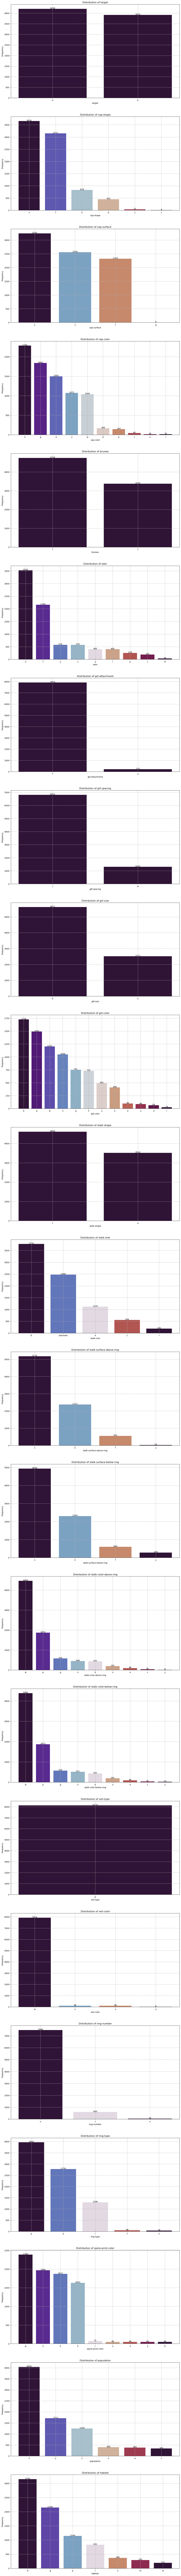

In [9]:
fig, ax = plt.subplots(len(df.columns), 1, figsize=(15,10*len(df.columns)))

for column in range(len(df.columns)):
    # Take groups
    groups = df[df.columns[column]].value_counts()
    
    # Visualize
    ax[column].bar(groups.keys(), 
                   groups.values,
                   color = cm.twilight_shifted(np.linspace(0, 1, len(groups))))
    # Values as text
    for i in range(len(groups)):
        ax[column].text(groups.keys()[i], 
                        groups.values[i], 
                        str(groups.values[i]), 
                        horizontalalignment='center')
    # Legend
    # ax[column].legend(df.columns[column])
    
    ax[column].set_xlabel(df.columns[column])
    ax[column].set_ylabel('Frequency')
    ax[column].set_title('Distribution of '+ str(df.columns[column]))
    ax[column].grid(True, linewidth= 1, linestyle="--")



## Data Pre-processing

Firstly let's change the values of target to 0 and 1

In [10]:
df.target.replace({
    "p": 1,
    "e": 0
}, inplace = True)

Now, we have as poisonous class 1 and edible class 0

In [11]:
df.target

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: target, Length: 8124, dtype: int64

Separate data into X and Y 

In [12]:
X = df.drop("target", axis=1)
Y = df.target.values

In [13]:
Y[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [14]:
np.unique(Y, return_counts = True)

(array([0, 1], dtype=int64), array([4208, 3916], dtype=int64))

all features in X set are object (categorical) in this case there are too many labels for generate dummy variables, we'll take label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# We can make multiple transformations one by one or apply 
#  labelEncoder to all columns

print("Before label encoder")
print(X.head(5), "\n")
X = X.apply(LabelEncoder().fit_transform)

print("After label encoder")
print(X.head(5))

Before label encoder
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      

Now we alredy have all values as numbers, let's create train and test sets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_Train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    stratify=Y, test_size=0.30)

In [18]:
print("Shape of X_train {}".format(X_Train.shape))
print("Shape of X_test {}".format(X_test.shape))
print("Shape of y_train {}".format(y_train.shape))
print("Shape of y_test {}".format(y_test.shape))

Shape of X_train (5686, 22)
Shape of X_test (2438, 22)
Shape of y_train (5686,)
Shape of y_test (2438,)


## Find the best K-Value

Text(0, 0.5, 'Mean error')

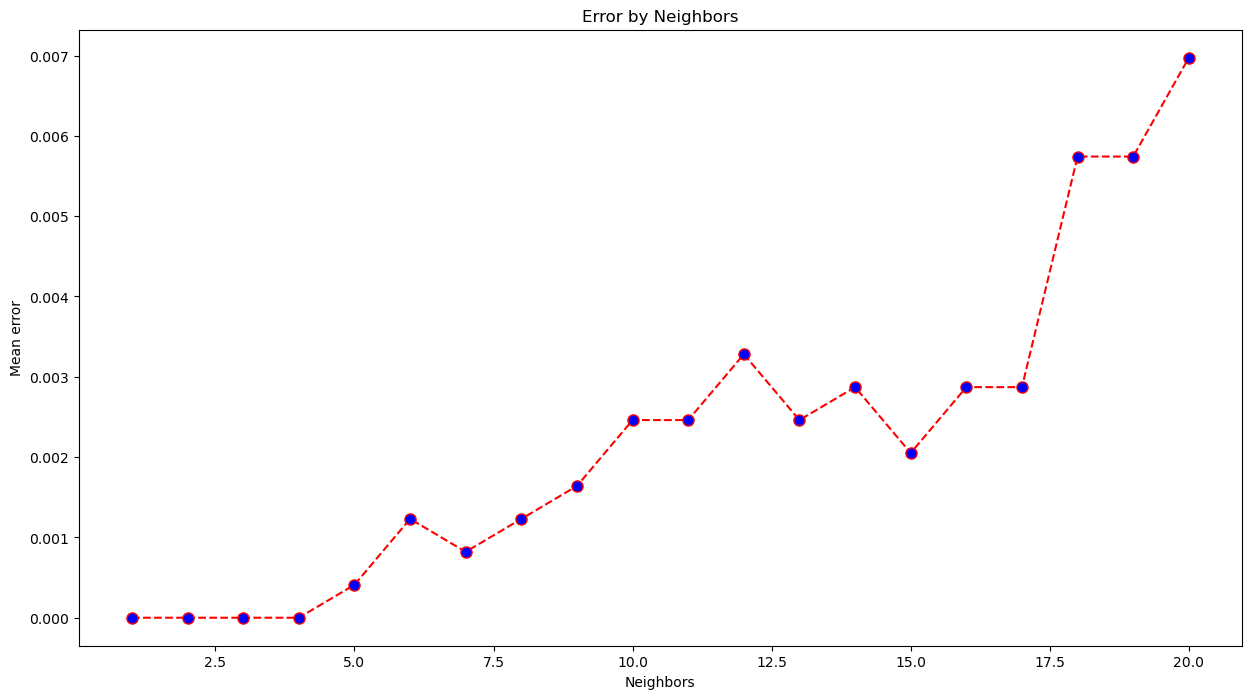

In [19]:
error = []

from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_Train, y_train)
    pred_i = model.predict(X_test)
    # Mean of error number
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (15, 8))
plt.plot(range(1, 21), error, 
         color = "red", 
         linestyle="dashed", 
         marker = 'o',
         markerfacecolor = "blue", 
         markersize = 8)
plt.title("Error by Neighbors")
plt.xlabel("Neighbors")
plt.ylabel("Mean error")

With 3 neighbors we've the lowest error, then if we increase the number of neighbors we'll increase the error and produce overfitting

In [20]:
# Train
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_Train, y_train)

# Test
preds_knn = model.predict(X_test)

## Model Evaluation

<Axes: >

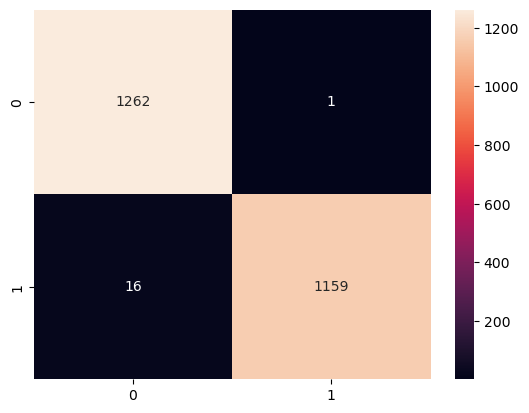

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, preds_knn)

import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')

In [22]:
print("Accuracy of the model ", accuracy_score(y_test, preds_knn))

Accuracy of the model  0.9930270713699754
